The torsion $τ$ measures the speed of rotation of the binormal vector at a given point; when the torsion increases, the binormal vector rotates faster around the axis. The resulting value can be either positive or negative, it follows a simple norm, being positive when the rotation of the osculating plane (torsion, normal) is in a right-handend position.

In [55]:
from sympy import *    

In [56]:
t = symbols('t')

In [57]:
# parametric function

fx = cos(t*0.5) + 1/3
fy = sin(t+1)
fz = cos(t-1)

display(fx)
display(fy)
display(fz)

cos(0.5*t) + 0.333333333333333

sin(t + 1)

cos(t - 1)

In [58]:
funcs = [fx, fy, fz]

In [59]:
# apply function in space:

def space_func(funcs, t):
    
    return [f for f in funcs]

In [60]:
space_func(funcs, t)

[cos(0.5*t) + 0.333333333333333, sin(t + 1), cos(t - 1)]

In [61]:
def space_func_eval(funcs, t):
    
    return [f.diff(t) for f in funcs]

The derivative function of a vector is the differentiation of each vector component with respect to the variable. The following functions are used in three dimensions but can generalize to n-space, with the parametric functions as input.

$$
\dfrac{\mathrm{d}\boldsymbol{r} }{\mathrm{d} t}=\dfrac{\mathrm{d}}{\mathrm{d} t}\Bigl[\bigl(x(t),y(t),z(t)\bigl)\Bigl]=\left(\dfrac{\mathrm{d} x}{\mathrm{d} t},\dfrac{\mathrm{d} y}{\mathrm{d} t},\dfrac{\mathrm{d} z}{\mathrm{d} t}\right).
$$

In [62]:
f1 = space_func_eval(funcs, t)
f2 = space_func_eval(f1, t)
f3 = space_func_eval(f2, t)

print(f1)
print(f2)
print(f3)

[-0.5*sin(0.5*t), cos(t + 1), -sin(t - 1)]
[-0.25*cos(0.5*t), -sin(t + 1), -cos(t - 1)]
[0.125*sin(0.5*t), -cos(t + 1), sin(t - 1)]


In [63]:
def space_eval(funcs, t1):

    return [(float)(f.subs({t:t1}).evalf()) for f in funcs]

In [64]:
space_eval(funcs, 0.45)

[1.3081274404022767, 0.9927129910375885, 0.8525245220595057]

In [65]:
# plot: 

import matplotlib.pyplot as plt
import numpy as np

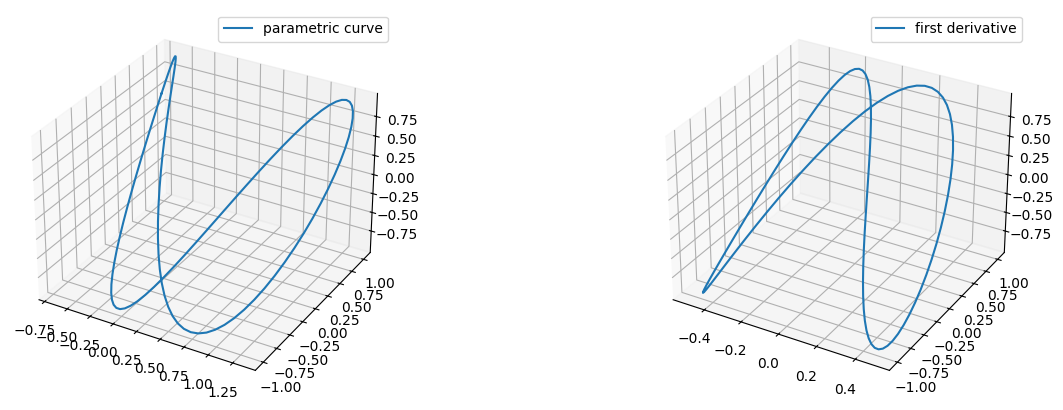

In [66]:
fig = plt.figure(figsize=(15, 5))
# fig, axs = plt.subplots(1, 2, figsize=(15, 5))


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)

x_l = np.array([ space_eval(funcs, t1) for t1 in theta ] )
x_r = np.array([ space_eval(f1, t1) for t1 in theta ] )

ax1.plot(*x_l.T, label='parametric curve')
ax1.legend()

ax2.plot(*x_r.T, label='first derivative')
ax2.legend()

plt.show()

For torsion to be computed first, second and third derivatives must be defined for the parametric expression:

$$
    \tau = \frac{\det{(\gamma',\gamma'',\gamma''')}}{(\kappa s'^3)^2} 
    = \frac{\det{(\gamma',\gamma'',\gamma''')}}{\lVert \gamma' \times \gamma'' \rVert^2} 
    = \frac{(\gamma' \times \gamma'') * \gamma'''}{\lVert \gamma' \times \gamma'' \rVert^2}
$$

In [67]:
def torsion (t1):

    dx    = space_eval(f1, t1)
    ddx   = space_eval(f2, t1)
    dddx  = space_eval(f3, t1)

    cross = np.cross(dx, ddx)

    cross_norm = np.linalg.norm(cross)

    return np.dot(cross , dddx) / pow(cross_norm, 2) 

In [68]:
torsion_l = np.array([torsion(t2) for t2 in theta])

print(torsion_l)

[ 1.17768961e-16  4.18727122e-02  8.29323767e-02  1.22662011e-01
  1.60904056e-01  1.97868428e-01  2.34105891e-01  2.70453234e-01
  3.07957545e-01  3.47778287e-01  3.91047767e-01  4.38645752e-01
  4.90820815e-01  5.46596525e-01  6.03000779e-01  6.54445022e-01
  6.93022183e-01  7.10582110e-01  7.02306741e-01  6.69500097e-01
  6.19105713e-01  5.60319453e-01  5.01105302e-01  4.46591947e-01
  3.99213978e-01  3.59573980e-01  3.27287028e-01  3.01556553e-01
  2.81494938e-01  2.66272972e-01  2.55172111e-01  2.47586802e-01
  2.43002530e-01  2.40961785e-01  2.41022972e-01  2.42714289e-01
  2.45484611e-01  2.48656128e-01  2.51388350e-01  2.52668904e-01
  2.51349803e-01  2.46243141e-01  2.36273012e-01  2.20653481e-01
  1.99039659e-01  1.71598950e-01  1.38978747e-01  1.02188479e-01
  6.24403809e-02  2.09912931e-02 -2.09925874e-02 -6.25445694e-02
 -1.02981991e-01 -1.41964322e-01 -1.79518991e-01 -2.16031631e-01
 -2.52204297e-01 -2.88989583e-01 -3.27504880e-01 -3.68917527e-01
 -4.14269550e-01 -4.64184

With simple two color palette, let's plot the torsion metric along the three dimensional curve, on the right, there is the evolution of this metric based on the parameterized value t.

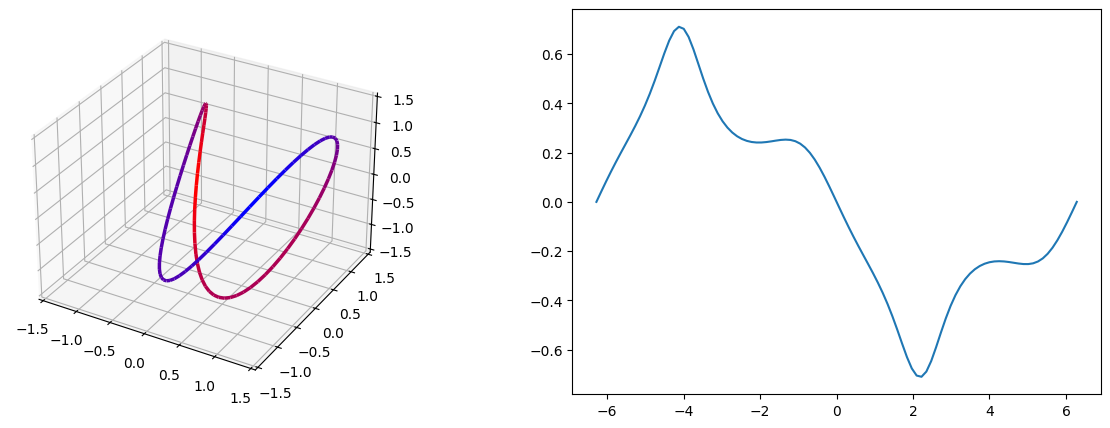

In [69]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d.art3d import Line3DCollection

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_zlim(-1.5,1.5)

cmap = LinearSegmentedColormap.from_list("", [(0, 0, 1), (1, 0, 0)])

points = x_l.reshape(-1,1,3)

segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = Line3DCollection(segments, cmap=cmap, linewidth=2.5)

lc.set_array(torsion_l)

ax1.add_collection(lc)

ax2.plot(theta, torsion_l)

plt.show()